In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install plotly
!pip install squarify

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

# Tìm trong tất cả các thư mục được chia sẻ
def find_file_in_all_drives(filename):
    base_path = '/content/gdrive'
    for root, dirs, files in os.walk(base_path):
        if filename in files:
            return os.path.join(root, filename)
    return None

file_path = find_file_in_all_drives('rfm.csv')
if file_path:
    print(f"Found file at: {file_path}")
    rfm_df = pd.read_csv(file_path)
else:
    print("File not found in any Google Drive location")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
Found file at: /content/gdrive/.shortcut-targets-by-id/1KCLOFbsop0lTMWeXeVuopEz0IZW_1NVJ/Project1/rfm.csv


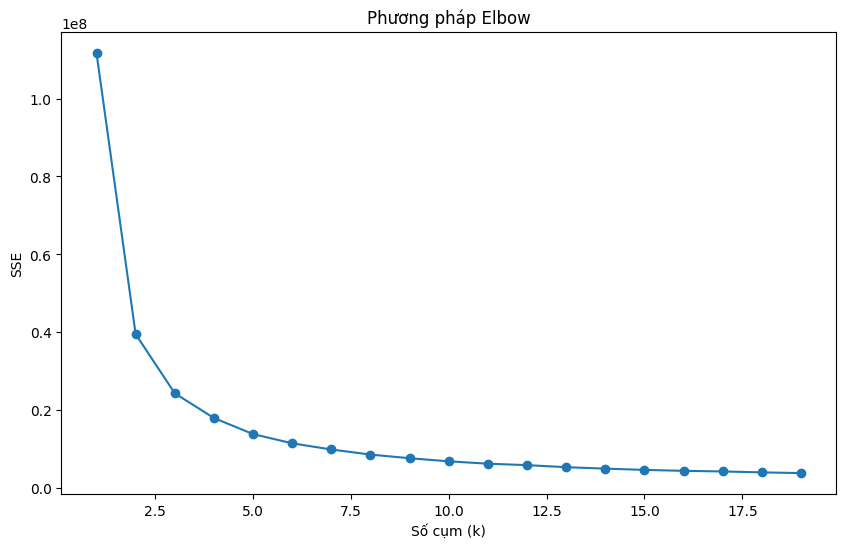

Phân tích các cụm khách hàng:
         Recency Frequency Monetary      
            mean      mean     mean count
Cluster                                  
0        3429.30      9.59    71.32  1204
1        3726.74      7.23    61.28   715
2        3437.63     17.08   175.41   603
3        3934.38      4.43    37.16   300
4        3565.81      9.46    78.36  1076


In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import squarify
from datetime import datetime

# Đọc dữ liệu
rfm_df = pd.read_csv('/content/gdrive/.shortcut-targets-by-id/1KCLOFbsop0lTMWeXeVuopEz0IZW_1NVJ/Project1/rfm.csv')
transactions_df = pd.read_csv('/content/gdrive/.shortcut-targets-by-id/1KCLOFbsop0lTMWeXeVuopEz0IZW_1NVJ/Project1/processed_transactions.csv')
products_df = pd.read_csv('/content/gdrive/.shortcut-targets-by-id/1KCLOFbsop0lTMWeXeVuopEz0IZW_1NVJ/Project1/Products_with_Categories.csv')

from sklearn.cluster import KMeans

# Chuẩn bị dữ liệu cho clustering
df_now = rfm_df[['Recency','Frequency','Monetary']]

# Tìm số cụm tối ưu bằng Elbow method
sse = {}
for k in range(1, 20):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_now)
    sse[k] = kmeans.inertia_

# Vẽ biểu đồ Elbow
plt.figure(figsize=(10, 6))
plt.plot(list(sse.keys()), list(sse.values()), marker='o')
plt.xlabel('Số cụm (k)')
plt.ylabel('SSE')
plt.title('Phương pháp Elbow')
plt.show()

# Áp dụng KMeans với k=5
model = KMeans(n_clusters=5, random_state=42)
model.fit(df_now)
df_now["Cluster"] = model.labels_

# Phân tích các cụm
cluster_analysis = df_now.groupby('Cluster').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': ['mean', 'count']
}).round(2)

# Create rfm_agg2 DataFrame
rfm_agg2 = cluster_analysis.copy()
rfm_agg2.columns = rfm_agg2.columns.droplevel()
rfm_agg2.columns = ['RecencyMean', 'FrequencyMean', 'MonetaryMean', 'Count']
rfm_agg2['Percent'] = round((rfm_agg2['Count']/rfm_agg2.Count.sum())*100, 2)
rfm_agg2 = rfm_agg2.reset_index()
rfm_agg2['Cluster'] = 'Cluster ' + rfm_agg2['Cluster'].astype('str')

print("Phân tích các cụm khách hàng:")
print(cluster_analysis)

# Tạo biểu đồ phân tán 3D
fig = px.scatter(rfm_agg2,
                x="RecencyMean",
                y="MonetaryMean",
                size="FrequencyMean",
                color="Cluster",
                hover_name="Cluster",
                size_max=100,
                title="Phân cụm khách hàng")
fig.show()